In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


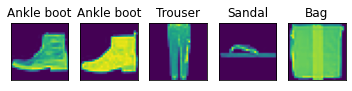

In [2]:
# Loading the Fasion MNIST Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
labels_dict = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot'
}

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

# Plotting the Original Images
n = 5
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title(labels_dict[str(y_test[select_img_index])])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
# Compressing Images using an Autoencoder with 2 Dense Layers
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
# Compiling the Model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
# Training the Model
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0239 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [6]:
# Model Summary
autoencoder.encoder.summary(), autoencoder.decoder.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 50,960
Trainable

In [7]:
# Encoding and Decoding Images
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

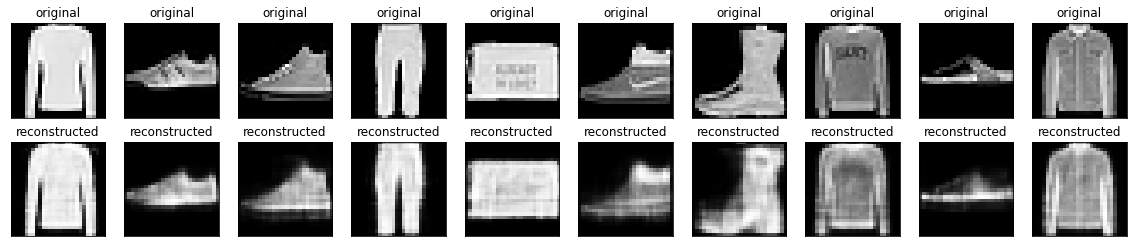

In [8]:
# Plotting the Original and Reconstructed Image
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[select_img_index])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
# Denoising Images Using Convolution Autoencoder
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


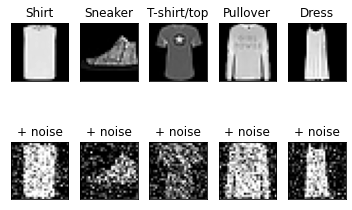

In [11]:
# Adding Noise to Images
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


# Plotting Original and Noisy Images
n = 5
for i in range(n):
    # Original 
    ax = plt.subplot(2, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(tf.squeeze(x_test[select_img_index]))
    plt.title(labels_dict[str(y_test[select_img_index])])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(tf.squeeze(x_test_noisy[select_img_index]))
    plt.title('+ noise')
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# Training an Autoencoder using Conv2D and Conv2DTranspose Layers
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])
        
        # The Decoder upsamples the images back from 7x7 to 28x28.
        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()

In [13]:
# Compiling the Autoencoder
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [14]:
# Training the Model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.0208 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [15]:
# Model Summary
autoencoder.encoder.summary(), autoencoder.decoder.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                    

In [16]:
# Encoding and Decoding Images
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

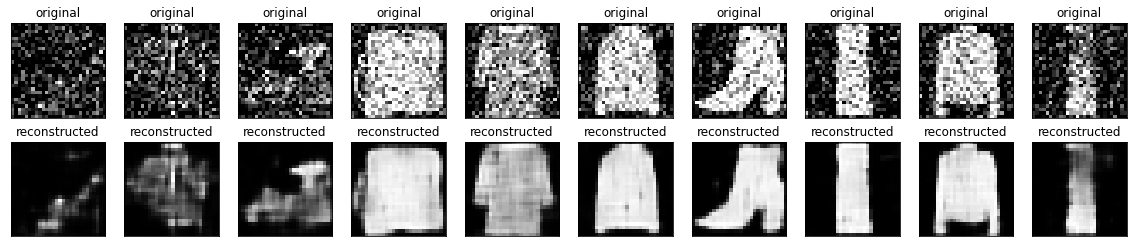

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Plotting Original
    ax = plt.subplot(2, n, i + 1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(tf.squeeze(x_test_noisy[select_img_index]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plotting Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(decoded_imgs[select_img_index]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()